In [2]:
# Importing 
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

pd.options.mode.chained_assignment = None # default='warn'
%matplotlib inline

In [3]:
# reading Melbourne housing data
house_data = pd.read_csv("melb_data.csv")

In [4]:
house_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
house_data.shape

(13580, 21)

In [6]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [7]:
house_data.columns.tolist()

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [8]:
house_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [10]:
house_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [11]:
# Splitting the data and selecting relevant columns
feature_data = house_data[["Suburb", "Rooms", "Type", "SellerG", "Distance", "Postcode", "YearBuilt",
                           "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea"]]
target_data = house_data["Price"]

In [12]:
feature_data.head()

,Suburb,Rooms,Type,SellerG,Distance,Postcode,YearBuilt,Bedroom2,Bathroom,Car,Landsize,BuildingArea
0,Abbotsford,2,h,Biggin,2.5,3067.0,NaN,2.0,1.0,1.0,202.0,NaN
1,Abbotsford,2,h,Biggin,2.5,3067.0,1900.0,2.0,1.0,0.0,156.0,79.0
2,Abbotsford,3,h,Biggin,2.5,3067.0,1900.0,3.0,2.0,0.0,134.0,150.0
3,Abbotsford,3,h,Biggin,2.5,3067.0,NaN,3.0,2.0,1.0,94.0,NaN
4,Abbotsford,4,h,Nelson,2.5,3067.0,2014.0,3.0,1.0,2.0,120.0,142.0


In [13]:
feature_data.isnull().sum()

Suburb             0
Rooms              0
Type               0
SellerG            0
Distance           0
Postcode           0
YearBuilt       5375
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
dtype: int64

In [14]:
# Selecting only missing data
column_miss = feature_data.isnull().sum()
column_miss = column_miss[column_miss!=0]
column_miss

YearBuilt       5375
Car               62
BuildingArea    6450
dtype: int64

In [15]:
feature_data["Type"].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [16]:
feature_data.loc[feature_data["Type"]=="h"].isnull().sum()

Suburb             0
Rooms              0
Type               0
SellerG            0
Distance           0
Postcode           0
YearBuilt       4041
Bedroom2           0
Bathroom           0
Car               60
Landsize           0
BuildingArea    4589
dtype: int64

In [17]:
feature_data.loc[feature_data["Type"]=="u"].isnull().sum()

Suburb             0
Rooms              0
Type               0
SellerG            0
Distance           0
Postcode           0
YearBuilt        982
Bedroom2           0
Bathroom           0
Car                2
Landsize           0
BuildingArea    1433
dtype: int64

In [19]:
feature_data.loc[feature_data["Type"]=="t"].isnull().sum()

Suburb            0
Rooms             0
Type              0
SellerG           0
Distance          0
Postcode          0
YearBuilt       352
Bedroom2          0
Bathroom          0
Car               0
Landsize          0
BuildingArea    428
dtype: int64

In [20]:
feature_data.loc[feature_data["Type"]=="t"]["BuildingArea"]

21         NaN
38       225.0
42       134.0
48        90.0
56       133.0
         ...  
13437    215.0
13485      NaN
13504    138.0
13521      0.0
13526    128.0
Name: BuildingArea, Length: 1114, dtype: float64

In [21]:
# Classified data per Type for handling missing value
data_h = feature_data.loc[feature_data["Type"]=="h"]
data_u = feature_data.loc[feature_data["Type"]=="u"]
data_t = feature_data.loc[feature_data["Type"]=="t"]

In [22]:
# Imputing missing data
imputer = SimpleImputer()
feature_data.loc[feature_data.Type == "h", "Car"] = imputer.fit_transform(data_h["Car"].values.reshape(-1,1))
feature_data.loc[feature_data.Type == "h", "YearBuilt"] = imputer.fit_transform(data_h["YearBuilt"].values.reshape(-1,1))
feature_data.loc[feature_data.Type == "h", "BuildingArea"] = imputer.fit_transform(data_h["BuildingArea"].values.reshape(-1,1))
feature_data.loc[feature_data.Type == "u", "Car"] = imputer.fit_transform(data_u["Car"].values.reshape(-1,1))
feature_data.loc[feature_data.Type == "u", "YearBuilt"] = imputer.fit_transform(data_u["YearBuilt"].values.reshape(-1,1))
feature_data.loc[feature_data.Type == "u", "BuildingArea"] = imputer.fit_transform(data_u["BuildingArea"].values.reshape(-1,1))
feature_data.loc[feature_data.Type == "t", "YearBuilt"] = imputer.fit_transform(data_t["YearBuilt"].values.reshape(-1,1))
feature_data.loc[feature_data.Type == "t", "BuildingArea"] = imputer.fit_transform(data_t["BuildingArea"].values.reshape(-1,1))

In [23]:
feature_data.isnull().sum()

Suburb          0
Rooms           0
Type            0
SellerG         0
Distance        0
Postcode        0
YearBuilt       0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
dtype: int64

In [24]:
feature_data.head()

,Suburb,Rooms,Type,SellerG,Distance,Postcode,YearBuilt,Bedroom2,Bathroom,Car,Landsize,BuildingArea
0,Abbotsford,2,h,Biggin,2.5,3067.0,1954.081176,2.0,1.0,1.0,202.0,176.866248
1,Abbotsford,2,h,Biggin,2.5,3067.0,1900.000000,2.0,1.0,0.0,156.0,79.000000
2,Abbotsford,3,h,Biggin,2.5,3067.0,1900.000000,3.0,2.0,0.0,134.0,150.000000
3,Abbotsford,3,h,Biggin,2.5,3067.0,1954.081176,3.0,2.0,1.0,94.0,176.866248
4,Abbotsford,4,h,Nelson,2.5,3067.0,2014.000000,3.0,1.0,2.0,120.0,142.000000


In [25]:
# Rounding "YearBuilt" and "BuildingArea" to one digit
feature_data["YearBuilt"] = round(feature_data["YearBuilt"],0)

In [26]:
feature_data["BuildingArea"] = round(feature_data["BuildingArea"],0)

In [27]:
feature_data.head()

,Suburb,Rooms,Type,SellerG,Distance,Postcode,YearBuilt,Bedroom2,Bathroom,Car,Landsize,BuildingArea
0,Abbotsford,2,h,Biggin,2.5,3067.0,1954.0,2.0,1.0,1.0,202.0,177.0
1,Abbotsford,2,h,Biggin,2.5,3067.0,1900.0,2.0,1.0,0.0,156.0,79.0
2,Abbotsford,3,h,Biggin,2.5,3067.0,1900.0,3.0,2.0,0.0,134.0,150.0
3,Abbotsford,3,h,Biggin,2.5,3067.0,1954.0,3.0,2.0,1.0,94.0,177.0
4,Abbotsford,4,h,Nelson,2.5,3067.0,2014.0,3.0,1.0,2.0,120.0,142.0


In [28]:
# Converting categorical data value to numerical data value
encoder = OrdinalEncoder()
feature_data["Suburb"] = encoder.fit_transform(feature_data[["Suburb"]])
feature_data["SellerG"] = encoder.fit_transform(feature_data[["SellerG"]])
feature_data["Type"] = encoder.fit_transform(feature_data[["Type"]])

In [29]:
feature_data.head()

,Suburb,Rooms,Type,SellerG,Distance,Postcode,YearBuilt,Bedroom2,Bathroom,Car,Landsize,BuildingArea
0,0.0,2,0.0,23.0,2.5,3067.0,1954.0,2.0,1.0,1.0,202.0,177.0
1,0.0,2,0.0,23.0,2.5,3067.0,1900.0,2.0,1.0,0.0,156.0,79.0
2,0.0,3,0.0,23.0,2.5,3067.0,1900.0,3.0,2.0,0.0,134.0,150.0
3,0.0,3,0.0,23.0,2.5,3067.0,1954.0,3.0,2.0,1.0,94.0,177.0
4,0.0,4,0.0,155.0,2.5,3067.0,2014.0,3.0,1.0,2.0,120.0,142.0


In [29]:
scaler = StandardScaler()
scaled = scaler.fit_transform(feature_data)
scaled

array([[-1.71982483, -0.98146337, -0.63200323, ..., -0.63584819,
        -0.08931566,  0.06219426],
       [-1.71982483, -0.98146337, -0.63200323, ..., -1.67699936,
        -0.10084297, -0.18720721],
       [-1.71982483,  0.06487613, -0.63200323, ..., -1.67699936,
        -0.10635603, -0.00651839],
       ...,
       [ 1.65763629,  0.06487613, -0.63200323, ...,  2.48760531,
        -0.03067672,  0.06219426],
       [ 1.65763629,  1.11121563, -0.63200323, ...,  3.52875648,
         0.0770786 ,  0.011296  ],
       [ 1.74622544,  1.11121563, -0.63200323, ..., -0.63584819,
        -0.04922066, -0.10322508]])

In [30]:
cols = feature_data.columns

In [37]:
print("size of feature and target data is: ", feature_data.shape, target_data.shape)

size of feature and target data is:  (13580, 12) (13580,)


In [39]:
# Dropping few columns from the input data
feature_data = house_data.drop(["Suburb", "Rooms", "Type", "SellerG", "Distance", "Postcode", "YearBuilt",
                           "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea"], axis=1)
target_data = house_data["Price"]

In [40]:
# Getting shape of both x ang y
feature_data.shape , target_data.shape

((13580, 9), (13580,))

In [41]:
# Getting the datatypes
feature_data.dtypes

Address           object
Price            float64
Method            object
Date              object
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [42]:
# Correlation of all columns
house_data.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


In [43]:
# Feature scale
features = ['Rooms', 'Price', 'Distance']
select_house_data = house_data[features]
select_house_data.columns

Index(['Rooms', 'Price', 'Distance'], dtype='object')

In [45]:
# Scalling features
from sklearn.preprocessing import StandardScaler
K = StandardScaler().fit_transform(select_house_data)
K[:5]

array([[-0.98146337,  0.63244803, -1.30148498],
       [-0.98146337, -0.06363975, -1.30148498],
       [ 0.06487613,  0.6089844 , -1.30148498],
       [ 0.06487613, -0.35302456, -1.30148498],
       [ 1.11121563,  0.82015709, -1.30148498]])

In [46]:
# Kmeans model to divide data into 6 cluster 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
model = kmeans.fit(K)
model

KMeans(n_clusters=6)

In [48]:
# Cluster model
axis = model.cluster_centers_
axis[:5]

array([[ 0.02316638,  0.44642433, -0.6397551 ],
       [-0.09084381, -0.42135014,  0.4934544 ],
       [ 1.34654478,  0.20875911,  0.31978746],
       [ 0.49380112, -0.55217373,  2.88416877],
       [-1.18287848, -0.6695442 , -0.63601792]])

In [49]:
# Shape of the cluster
axis.shape

(6, 3)

In [51]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_axis(featuresUsed, axis):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(axis)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [52]:
# Function that creates Parallel Plots
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [53]:
# Returns the six clusters and their corresponding values for the centroids
P = pd_axis(features, axis)
P

,Rooms,Price,Distance,prediction
0,0.023166,0.446424,-0.639755,0
1,-0.090844,-0.421350,0.493454,1
2,1.346545,0.208759,0.319787,2
3,0.493801,-0.552174,2.884169,3
4,-1.182878,-0.669544,-0.636018,4
5,1.220162,2.614867,-0.344079,5


In [54]:
# Prediction of future house pricing using K means
house_data['predicted_region'] = kmeans.fit_predict(K)
house_data['predicted_region'] = house_data['predicted_region'].astype("category")
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,predicted_region
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,1
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,3
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,1
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,1
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,4
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,1
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,1
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,5


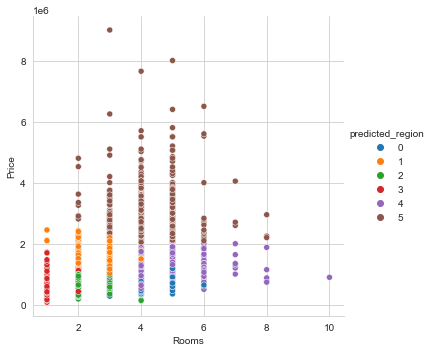

In [58]:
# Scatter plot for bedrooms, price and predicted_region
sns.set_style('whitegrid')
sns.relplot(x='Rooms', y='Price', hue='predicted_region', data=house_data, kind='scatter');

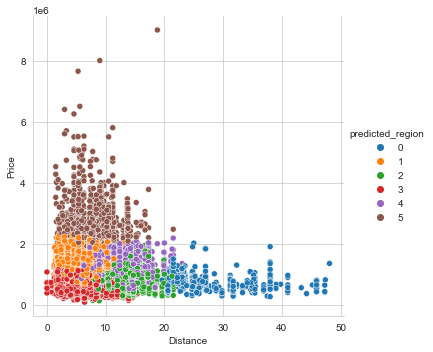

In [61]:
# Scatter plot for area, price and predicted_region
sns.set_style('whitegrid')
sns.relplot(x='Distance', y='Price', hue='predicted_region', data=house_data, kind='scatter');

In [62]:
# Descriptive data for predicted_region, price, area and bedrooms
median_attributes = ['predicted_region', 'Price', 'Distance', 'Rooms']
income_house = house_data[median_attributes]
income_house.groupby(['predicted_region']).describe()

Price                                                     \
                   count          mean            std        min        25%   
predicted_region                                                              
0                  705.0  7.226865e+05  255711.372766   266000.0   545000.0   
1                 2912.0  1.361461e+06  360760.636238   570000.0  1075000.0   
2                 3413.0  8.062240e+05  259782.740598   131000.0   625000.0   
3                 3481.0  6.480419e+05  245377.308494    85000.0   455500.0   
4                 2144.0  1.206723e+06  381931.607168   447000.0   895375.0   
5                  925.0  2.744899e+06  770455.747032  1900000.0  2250000.0   

                                                  Distance             ...  \
                        50%        75%        max    count       mean  ...   
predicted_region                                                       ...   
0                  680000.0   850000.0  2020000.0    705.0  27.063546  ...   
1                 1340000.0  1620000.0  2450000.0   2912.0   6.380529  ...   
2                  762500.0   935000.0  1950000.0   3413.0  13.023528  ...   
3                  602000.0   810000.0  1720000.0   3481.0   6.385177  ...   
4                 1200000.0  1500000.0  2185000.0   2144.0  12.041511  ...   
5                 2530000.0  3000000.0  9000000.0    925.0   8.127568  ...   

                               Rooms                                          \
                   75%   max   count      mean       std  min  25%  50%  75%   
predicted_region                                                               
0                 31.7  48.1   705.0  3.409929  0.681045  2.0  3.0  3.0  4.0   
1                  8.2  14.3  2912.0  2.963599  0.400164  1.0  3.0  3.0  3.0   
2                 14.3  21.5  3413.0  2.847348  0.363755  1.0  3.0  3.0  3.0   
3                  8.5  15.4  3481.0  1.806952  0.396925  1.0  2.0  2.0  2.0   
4                 14.0  23.0  2144.0  4.225746  0.527693  3.0  4.0  4.0  4.0   
5                 10.3  21.5   925.0  4.103784  0.779913  2.0  4.0  4.0  5.0   

                        
                   max  
predicted_region        
0                  6.0  
1                  4.0  
2                  4.0  
3                  3.0  
4                 10.0  
5                  8.0  

[6 rows x 24 columns]